# 빅데이터 개론 문제 모음
> 10월 27일 테스트

- toc: true
- branch: master
- badges: true
- comments: true
- author: 김혜지
- categories: [python]

## 파이썬 기초

예를 들어 아르바이트 직원의 월급을 계산하는 일반적인 작업을 고려헤 보자. 먼저 시간당 임금(hour_rate)이 정해지고 다음에 근로 일수 (month_working_days) 그리고 일간 근로 시간(day_working_hours)이 나오면 세 값을 곱하여 월급이 정해진다.

1월에 일한 철수의 월급을 계산하기

### 답

In [74]:
hour_rate = 10000
month_working_days = 20
day_working_hours = 4

monthpay = hour_rate * month_working_days * day_working_hours

monthpay

800000

## 데이터 프레임/ 슬라이싱/ 챕터 1 문제

1. 사진과 같은 데이터 프레임을 만들어라, 5*3의 데이터 프레임 형식 

열 이름 : area, pop, den, 행 이름 : cal, Tex NY, Flor, Ill

2. 이 데이터 프레임의 shape을 출력하여 보아라
3. 평균 면적을 계산하여라 
4. 인구수가 2000만명 이하인 중들을 골라내어라 또한 해당하는 주의 평균밀도를 계산하여 보아라 
5. 첫 3개의 행과 첫 2개의 열로 이루어진 subdataframe을 추출하여라
6. NY의 인구를 추출하여라.

### 답

In [9]:
import pandas as pd

In [23]:
# 1
df = pd.DataFrame({ "area" : [423967, 695662, 141297, 170312, 149995],
                   "pop" : [38332521, 26448193, 19651127, 19552860, 12882135],
                   "den" : [90.000000, 38.018740, 139.076746, 114.806121, 85.883763]
                  }, index = ["Cal", "Tex", "NY", "Flo", "Ill"] )

df

,area,pop,den
Cal,423967,38332521,90.000000
Tex,695662,26448193,38.018740
NY,141297,19651127,139.076746
Flo,170312,19552860,114.806121
Ill,149995,12882135,85.883763


In [24]:
# 2 
df.shape

(5, 3)

In [26]:
# 3 평균 면적 
df["area"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of Cal    423967
Tex    695662
NY     141297
Flo    170312
Ill    149995
Name: area, dtype: int64>

In [189]:
# 4. 인구수가 2000만명 이하인 주들을 골라내어라 
# 또한 해당하는 주의 평균밀도를 계산하여 보아라 

df[df["pop"] < 20000000]["den"].mean


<bound method NDFrame._add_numeric_operations.<locals>.mean of NY     139.076746
Flo    114.806121
Ill     85.883763
Name: den, dtype: float64>

In [72]:
# 5. 첫 3개의 행과 첫 2개의 열로 이루어진 subdataframe을 추출하여라
sub = df.iloc[:3, :2] #iloc
sub

# df.loc[["Cal","Tex", "NY"]][["area", "pop"]] #loc
# loc를 사용해서 행을 출력할 수 있다. 그리고 그 후 열로 접근 가능

# df[["area"]] # only Sereies  열만 출력 가능


423967

In [73]:
# 6. NY의 인구를 추출하여라.
#df.loc["NY"]["pop"]

df["pop"]["NY"] #열과 행 순, 여러개 출력하고 싶으면 loc나 iloc 사용하기

19651127

## 시각화

In [92]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')  # mac os 에서만 필요, colab 에서는 불필요 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

1. csv 파일 불러오기 "https://ilovedata.github.io/teaching/bigdata2/data/train-data-01.csv"
2. 자료에 포함된 운행되는 열차 번호 확인, unique() 함수 사용하기(시리즈 안에 있는 원소들을 중복이 없이 유일한 값만으로 출력해 주는 함수)
3. 원자료에서 다음 3개의 조건을 모두 만족하는 행들을 추출해서 참과 거짓으로 구성된 3개의 시리즈를 만들어 보자.

- 열차번호가 2번이다.
- 출발역은 서울역이다.
- 도착역은 부산역이다.

4. 날짜별로 2번 열차의 서울-부산간 탑승자수를 나타내는 시계열 그림(time series plot)을 그려보자.

----

5. 년월일로 날짜 데이터 변환해서 DATE2에 저장하기, to_datetime() 의 옵션 format='%Y%m%d' 은 변환에 사용할 정수 자료의 형식이 YYYYMMDD 로 년,월,일을 연결하여 만든 숫자라고 알려주는 것이다. 새로운 변수 DATE2를 데이터프레임에 추가
6. DATE2 를 아용하여 요일을 나타내는 새로운 변수 DAYOFWEEK 를 만들어 보자. dt.dayofweek
7. 요일별, 구간별 분석하기, 3개의 변수(요일, 출발역, 도착역)로 자료를 그룹화(grouping)하고 평균을 낸다.
8. 인덱스 표현하기 .reset_index(inplace = True)
9. 이제 원하는 출발역과 도착역을 선택하여 요일별 평균 탑승객 수를 살펴보자.아래는 서울에서 출발하여 부산에 도착하는 탑승객 수의 요일별 평균값을 구하고 그름으로 나타난 결과이다. 금요일이 다른 요일보다 현저하게 탑승객의 수가 많고 일요일이 다소 적다는 것을 알 수 있다.

### 답

In [76]:
dset = pd.read_csv("https://ilovedata.github.io/teaching/bigdata2/data/train-data-01.csv")

In [77]:
print(dset)

      TRAIN_NO      DATE STATION_DEPART STATION_ARRV  NUM_PASSENGER
0            2  20190701             서울           대전          106.0
1            2  20190702             서울           대전          113.0
2            2  20190703             서울           대전          146.0
3            2  20190704             서울           대전           84.0
4            2  20190705             서울           대전          105.0
...        ...       ...            ...          ...            ...
1764         6  20190726             울산           부산           10.0
1765         6  20190727             울산           부산            6.0
1766         6  20190728             울산           부산           21.0
1767         6  20190729             울산           부산           12.0
1768         6  20190730             울산           부산           11.0

[1769 rows x 5 columns]


In [83]:
# 2 열차 번호 확인
dset["TRAIN_NO"].unique()

array([2, 5, 6])

In [89]:

t1  = dset["TRAIN_NO"] ==2 # -열차번호가 2번이다.
t2  = dset["STATION_DEPART"] == "서울" # 출발역은 서울역이다.
t3  = dset["STATION_ARRV"] == "부산" #도착역은 부산역이다.

newdf = t1 & t2 & t3
newdf

0       False
1       False
2       False
3       False
4       False
        ...  
1764    False
1765    False
1766    False
1767    False
1768    False
Length: 1769, dtype: bool

In [106]:
# 2번 열차의 서울-부산간 탑승자수를 나타내는 시계열 그림(time series plot)을 그려보자
sd = dset[newdf] #데이터 셋으로 저장,

<AxesSubplot:xlabel='DATE'>

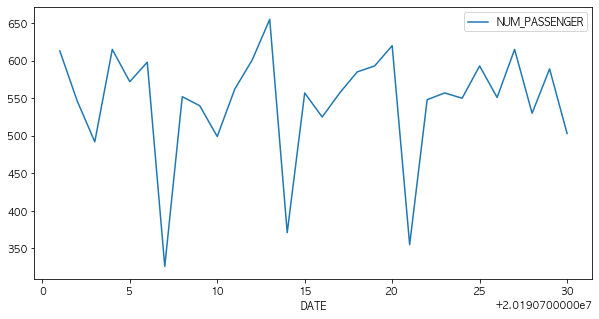

In [107]:
sd.plot(x = "DATE", y = "NUM_PASSENGER") #plot 사용하기 

In [133]:
# 6. 년월일로 날짜 데이터 변환해서 DATE2에 저장하기 #pd.to_datetime(데이터 셋, 포맷, 년도는 대문자로 변환), 새로운 변수 DATE2를 데이터프레임에 추가

dset["DATE2"] = pd.to_datetime(dset["DATE"], format = "%Y%m%d")
print(dset)

      TRAIN_NO      DATE STATION_DEPART STATION_ARRV  NUM_PASSENGER      DATE2
0            2  20190701             서울           대전          106.0 2019-07-01
1            2  20190702             서울           대전          113.0 2019-07-02
2            2  20190703             서울           대전          146.0 2019-07-03
3            2  20190704             서울           대전           84.0 2019-07-04
4            2  20190705             서울           대전          105.0 2019-07-05
...        ...       ...            ...          ...            ...        ...
1764         6  20190726             울산           부산           10.0 2019-07-26
1765         6  20190727             울산           부산            6.0 2019-07-27
1766         6  20190728             울산           부산           21.0 2019-07-28
1767         6  20190729             울산           부산           12.0 2019-07-29
1768         6  20190730             울산           부산           11.0 2019-07-30

[1769 rows x 6 columns]


In [181]:
# 6. DATE2 를 아용하여 요일을 나타내는 새로운 변수 DAYOFWEEK 를 만들어 보자.
# 7. 요일별, 구간별 분석하기, 3개의 변수(요일, 출발역, 도착역)로 자료를 그룹화(grouping)하고 평균을 낸다.
dset["Week"] = dset["DATE2"].dt.dayofweek #dayofweek는 괄호 치지 말기
train_group_data = dset[ [ 'STATION_DEPART', 'STATION_ARRV','Week','NUM_PASSENGER']]
dsetg = train_group_data.groupby(['STATION_DEPART','STATION_ARRV','Week']).mean()

In [174]:
train_group_data

,STATION_DEPART,STATION_ARRV,Week,NUM_PASSENGER
0,서울,대전,0,106.0
1,서울,대전,1,113.0
2,서울,대전,2,146.0
3,서울,대전,3,84.0
4,서울,대전,4,105.0
...,...,...,...,...
1764,울산,부산,4,10.0
1765,울산,부산,5,6.0
1766,울산,부산,6,21.0
1767,울산,부산,0,12.0


In [182]:
# 8. 인덱스 표현하기 
dsetg.reset_index(inplace = True)
dsetg


,STATION_DEPART,STATION_ARRV,Week,NUM_PASSENGER
0,광명,대전,0,16.300
1,광명,대전,1,15.200
2,광명,대전,2,20.750
3,광명,대전,3,21.125
4,광명,대전,4,18.125
...,...,...,...,...
219,행신,서울,2,12.750
220,행신,서울,3,10.000
221,행신,서울,4,8.250
222,행신,서울,5,7.500


In [186]:
# 9. 이제 원하는 출발역과 도착역을 선택하여 요일별 평균 탑승객 수를 살펴보자.
dsetw = dsetg[(dsetg["STATION_DEPART"] == "서울")  & (dsetg["STATION_ARRV"] == "대전")] #그룹화 하고 평균을 낸 데이ㅓ 셋에서 원하는 것을 고르기 그룹화 안 하고 고르면 많은 데이터 들이 출력 됨
dsetw

,STATION_DEPART,STATION_ARRV,Week,NUM_PASSENGER
84,서울,대전,0,99.266667
85,서울,대전,1,112.933333
86,서울,대전,2,117.500000
87,서울,대전,3,120.500000
88,서울,대전,4,99.583333
89,서울,대전,5,102.250000
90,서울,대전,6,102.750000


<AxesSubplot:xlabel='Week'>

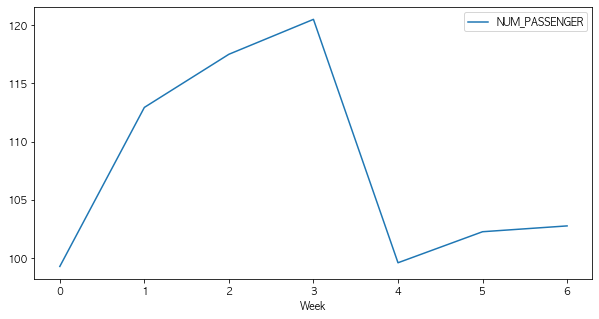

In [185]:
dsetw.plot(x = "Week", y= "NUM_PASSENGER") #월요일이 0

## 텍스트 슬라이싱

In [195]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)
import numpy as np
import pandas as pd

1. csv 파일 불러오기 "https://ilovedata.github.io/teaching/bigdata2/data/little-prince.txt"
2. 챕터 나누기 little_prince_chapters = little_prince.split('어린 왕자\r\n')
3. 문자열들로 구성된 리스트를 데이터프레임으로 변환하자. 이미 정의된 리스트는 아래와 같이 함수 pd.DataFrame() 를 이용하여 데이터프레임 final 로 만들 수 있다. 만들어진 데이터프레임 final 은 각 장에 해당하는 28개의 행과 문자열을 가지는 1개의 열로 구성된다. final = pd.DataFrame({'chapters': little_prince_chapters})
4. 빈도 계산 counts = final.applymap(lambda x: np.char.count(x, "어린 왕자"))



## 챕터2 실습 

1. `hstudent.csv'는 20명의 고등학생 성별, 학년, 키(cm), 몸무게(kg)를 조사한 자료이다.
체질량지수는 몸무게(kg)를 키의 제곱(m)으로 나눈 값입니다. 5번 학생의 체질량지수는?
10번 학생의 체질량지수는?
학생의 키와 몸무게를 각각 height 와 weight 에 저장하고, height 와 weight 를 사용하여 체질량지수 계산 5번 과 10번 학생 각각에 대하여 계산한 후 bmi5와 bmi10에 저장
bmi5 와 bmi10 의 크기 비교 결과 print 함수를 사용하여 보여주기 1번부터 5번까지의 학생 키를 원소로 가지는 리스트 변수 height1_5 생성
1번부터 3번까지 학생의 키 추출
1. 나는 전북대학교 학과 이름 입니다. (예, 나는 전북대학교 통계학과 최혜미입니다)
위 문자열을 값으로 가지는 변수 name_dept 를 생성 변수 name_dept 에서 전북대학교 추출


1. 챕터별로 여우 , ?, !의 빈도를 계산하고 그림으로 나타내어라.

counts = final.applymap(lambda x : np.chart.count(x,"여우"))

counts.plot()

## 챕터 3
부동소수점 : 17번째 자리를 아무리 더해도 소수점 16번째까지 출력 -> 17번째자리부터 부동소수점 
파이썬은 소수점 16자리까지 인식한다. 17번째부터는 인식 x

In [201]:
1/3 == (1/3 + 0.0000000000000001) #소수점 16번째 자리 더하기 

False

In [204]:
1/3 == (1/3 + 0.00000000000000001) #소수점 17번째 자리 더하기

True

In [205]:
#특수 문자열이 주어진 기능을 하지 못하게 하는 방법은 문자열을 정의할 때 r 로 시작하면 된다.
text_4 = r'C:\some\name'
print(text_4)

C:\some\name


## 실습

1. 본인의 단대, 학과, 학번, 이름(영문)을 각각 문자열로 정의하여라. 정의된 문자열을 하나로 결합하여라. 2. 위에서 정의된 본인의 이름을 모두 대문자로 바꾸어라.
3. 위에서 결합된 문자열에서 본인의 이름을 국문으로 바꾸어라.
4. 본인의 생년월일을 다음과 같은 형식으로 표기하는 문자열을 정의하여라. 1990/02/16
5. 생년월일에서 년에 해당하는 정보만을 추출하여라. 6. 생년월일을 년, 월, 일 새 부분으로 나누어라.

### 답 

## 챕터3 문제

다음과 같은 코드를 먼저 실행하고 물음에 답하여라

A = np.array([1, 4, 2, 5, 3])

1) A의 1, 3, 5 번째 원소를 추출하여라
2) A의 마지막 원소만 제외한 나머지로 이루어진 1차원 배열을 추출하여라
3) 5에서 1씩 감소하는 길이가 5인 1차원 배열을 만들고 B라 명명하여라
4) A와 B를 순서대로 연결하는 1차원 배열 C를 만들어라(concatenate([x,y])이용)
5) 위에서 만들어진 C로부터 A가 첫번째 행, B를 두번째 행이 되도록 2차원 배열(행렬) D를 정의 하여라 
6) D의 첫 두번째 행과 첫 두번째 열로 이루어진 부분행렬을 추출하여라
7) D의 세 번째 열로만 이루어진 배열을 추출하여라. 단, 1차원 배열이 아니라 2차원 배열의 속성을 그대로 가지도록 하여라

### 답 

## 챕터4/ 데이터프레임 